In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [4]:
data = pd.read_excel('/content/dataset assignment 2 (2).xlsx')
df = pd.DataFrame(data)
items = df.iloc[:, 1:]


In [5]:
tnu = len(df['users'])
tni = len(items.columns)

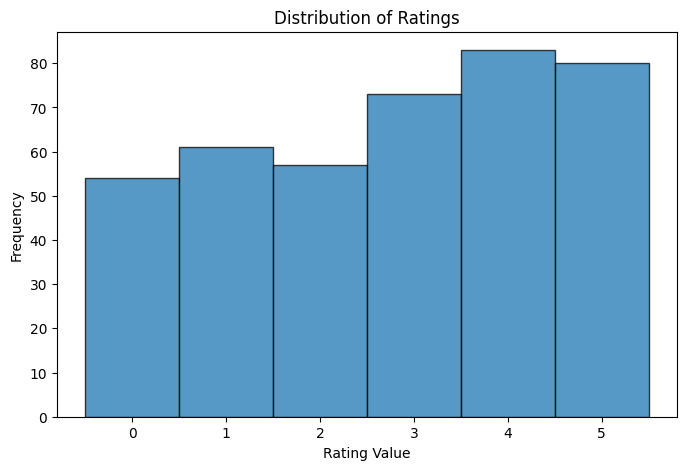

In [13]:
all_ratings = ratings_data.values.flatten()
all_ratings = all_ratings[~np.isnan(all_ratings)]


plt.figure(figsize=(8, 5))
plt.hist(all_ratings, bins=np.arange(-0.5, 6.5, 1), edgecolor='black', alpha=0.75)
plt.title("Distribution of Ratings")
plt.xlabel("Rating Value")
plt.ylabel("Frequency")
plt.xticks(range(6))
plt.show()

In [14]:
total_elements = ratings_data.size
non_nan_elements = np.count_nonzero(~np.isnan(ratings_data.values))
sparsity = 1 - (non_nan_elements / total_elements)
print(f"Sparsity of the matrix: {sparsity:.2%}")

Sparsity of the matrix: 20.93%


In [15]:
ratings_data = data.drop(columns=["users"])

rating_counts = ratings_data.count()
print(rating_counts)


jane eyre                35
1984                     34
wuthering                43
picture of dorian        11
catcher in rye           36
sense and sensibility    37
great expectations       37
tale of cities           38
brave new world          42
macbeth                  33
The Great Gatsby         35
picture of dorian        27
dtype: int64


In [19]:
I1, I2 = "macbeth", "picture of dorian"
average_I1 = ratings_data[I1].mean()
average_I2 = ratings_data[I2].mean()
ratings_data[I1].fillna(average_I1, inplace=True)
ratings_data[I2].fillna(average_I2, inplace=True)
item_averages = ratings_data.mean()
differences = ratings_data.subtract(item_averages, axis=1)
covariance_matrix = differences.cov()
top_5_1= covariance_matrix[I1].nlargest(6)[1:]
top_10_1 = covariance_matrix[I1].nlargest(11)[1:]
top_5_2 = covariance_matrix[I2].nlargest(6)[1:]
top_10_2 = covariance_matrix[I2].nlargest(11)[1:]

<ipython-input-19-8a9f573088f6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ratings_data[I1].fillna(average_I1, inplace=True)
<ipython-input-19-8a9f573088f6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [20]:
print(f"Top 5 peers for {I1}:\n{top_5_1}")
print(f"Top 10 peers for {I1}:\n{top_10_1}")
print(f"Top 5 peers for {I2}:\n{top_5_2}")
print(f"Top 10 peers for {I2}:\n{top_10_2}")

Top 5 peers for macbeth:
jane eyre         0.435243
tale of cities    0.372861
wuthering         0.366522
1984              0.278831
catcher in rye    0.177874
Name: macbeth, dtype: float64
Top 10 peers for macbeth:
jane eyre                0.435243
tale of cities           0.372861
wuthering                0.366522
1984                     0.278831
catcher in rye           0.177874
great expectations       0.067249
sense and sensibility   -0.061129
The Great Gatsby        -0.072295
picture of dorian       -0.255647
brave new world         -0.332594
Name: macbeth, dtype: float64
Top 5 peers for picture of dorian:
sense and sensibility    0.637248
tale of cities           0.524841
wuthering                0.337743
brave new world          0.296963
The Great Gatsby         0.264373
Name: picture of dorian, dtype: float64
Top 10 peers for picture of dorian:
sense and sensibility    0.637248
tale of cities           0.524841
wuthering                0.337743
brave new world          0.2969

In [21]:
def predict_rating(item, peers, reduced_data, indices):

    peer_weights = covariance_matrix[item][peers.index]
    weighted_sum = (reduced_data.loc[indices, peers.index] * peer_weights).sum(axis=1)
    normalized_predictions = weighted_sum / peer_weights.sum()

    return normalized_predictions


specific_indices_I1 = [2, 5,8,9,14,17,20]
specific_indices_I2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 23, 24, 37]

predicted_ratings_specific_I1 = predict_rating(I1, top_10_1, ratings_data, specific_indices_I1)
predicted_ratings_specific_I2 = predict_rating(I2, top_10_2, ratings_data, specific_indices_I2)

predicted_ratings_specific_I15 = predict_rating(I1, top_5_1, ratings_data, specific_indices_I1)
predicted_ratings_specific_I25 = predict_rating(I2, top_5_2, ratings_data, specific_indices_I2)

print("Predicted ratings for I1 10 ")
print(predicted_ratings_specific_I1)
print("Predicted ratings for I2 10 ")
print(predicted_ratings_specific_I2)

print("Predicted ratings for I1 5 ")
print(predicted_ratings_specific_I15)
print("Predicted ratings for I2 5 ")
print(predicted_ratings_specific_I25)


Predicted ratings for I1 10 
2     2.131485
5     1.875588
8     2.049169
9     3.013399
14    1.659844
17    0.313855
20    1.093318
dtype: float64
Predicted ratings for I2 10 
0     0.933791
1     2.268529
2     1.960169
3     2.737595
4     3.990017
5     3.359357
6     4.874826
7     3.024310
8     3.528307
9     1.384266
10    3.250669
11    2.320375
12    2.354047
23    3.331493
24    2.638821
37    1.809803
dtype: float64
Predicted ratings for I1 5 
2     1.964787
5     2.462149
8     2.948822
9     3.279958
14    2.127577
17    0.555671
20    1.466756
dtype: float64
Predicted ratings for I2 5 
0     1.686467
1     2.720948
2     2.545271
3     2.287489
4     3.488840
5     3.179009
6     4.018940
7     2.984830
8     3.274827
9     1.831778
10    2.876943
11    2.741646
12    2.705157
23    3.378282
24    2.546115
37    1.909868
dtype: float64


MLE


In [23]:
def calculate_mle_covariance(data):
    n = data.shape[1]
    covariance_matrix = pd.DataFrame(np.zeros((n, n)), columns=data.columns, index=data.columns)

    for item1 in data.columns:
        for item2 in data.columns:

            common_ratings = data[[item1, item2]].dropna()
            if len(common_ratings) > 1:

                covariance_matrix.loc[item1, item2] = np.cov(common_ratings[item1], common_ratings[item2], ddof=0)[0, 1]
            else:

                covariance_matrix.loc[item1, item2] = 0
    return covariance_matrix
covariance_matrix_mle = calculate_mle_covariance(ratings_data)

In [25]:
I1, I2 = "macbeth", "picture of dorian"

top_5_peers_I1_mle = covariance_matrix_mle[I1].nlargest(6)[1:]
top_10_peers_I1_mle = covariance_matrix_mle[I1].nlargest(11)[1:]

top_5_peers_I2_mle = covariance_matrix_mle[I2].nlargest(6)[1:]
top_10_peers_I2_mle = covariance_matrix_mle[I2].nlargest(11)[1:]

print(f"Top 5 peers for {I1} using MLE:\n{top_5_peers_I1_mle}")
print(f"Top 10 peers for {I1} using MLE:\n{top_10_peers_I1_mle}")
print(f"Top 5 peers for {I2} using MLE:\n{top_5_peers_I2_mle}")
print(f"Top 10 peers for {I2} using MLE:\n{top_10_peers_I2_mle}")

Top 5 peers for macbeth using MLE:
tale of cities        0.363049
wuthering             0.357999
1984                  0.270630
catcher in rye        0.172933
great expectations    0.065432
Name: macbeth, dtype: float64
Top 10 peers for macbeth using MLE:
tale of cities           0.363049
wuthering                0.357999
1984                     0.270630
catcher in rye           0.172933
great expectations       0.065432
macbeth                  0.000000
sense and sensibility   -0.059477
The Great Gatsby        -0.070230
picture of dorian       -0.232407
brave new world         -0.324675
Name: macbeth, dtype: float64
Top 5 peers for picture of dorian using MLE:
tale of cities      0.511029
wuthering           0.329888
brave new world     0.289893
The Great Gatsby    0.256820
jane eyre           0.081300
Name: picture of dorian, dtype: float64
Top 10 peers for picture of dorian using MLE:
tale of cities        5.110290e-01
wuthering             3.298880e-01
brave new world       2.8989

In [26]:
reduced_top_5_I1_mle = ratings_data[top_5_peers_I1_mle.index]
reduced_top_5_I2_mle = ratings_data[top_5_peers_I2_mle.index]

reduced_top_10_I1_mle = ratings_data[top_10_peers_I1_mle.index]
reduced_top_10_I2_mle = ratings_data[top_10_peers_I2_mle.index]

In [27]:
def predict_rating_for_user(item, user_index, peers, reduced_data, covariance_matrix):

    peer_weights = covariance_matrix[item][peers.index]
    user_ratings = reduced_data.loc[user_index]
    weighted_sum = (user_ratings * peer_weights).sum()
    prediction = weighted_sum / peer_weights.sum()

    return prediction

specific_indices_I1 = [2, 5, 8, 9, 14, 17, 20]
specific_indices_I2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 23, 24, 37]

predictions_I1_top_5 = {}
predictions_I2_top_5 = {}
predictions_I1_top_10 = {}
predictions_I2_top_10 = {}

for user_index in specific_indices_I1:
    predictions_I1_top_5[user_index] = predict_rating_for_user(I1, user_index, top_5_peers_I1_mle, reduced_top_5_I1_mle, covariance_matrix_mle)
    predictions_I1_top_10[user_index] = predict_rating_for_user(I1, user_index, top_10_peers_I1_mle, reduced_top_10_I1_mle, covariance_matrix_mle)

for user_index in specific_indices_I2:
    predictions_I2_top_5[user_index] = predict_rating_for_user(I2, user_index, top_5_peers_I2_mle, reduced_top_5_I2_mle, covariance_matrix_mle)
    predictions_I2_top_10[user_index] = predict_rating_for_user(I2, user_index, top_10_peers_I2_mle, reduced_top_10_I2_mle, covariance_matrix_mle)



In [28]:

print("Predicted ratings for I1 using top 5")
for user_index in specific_indices_I1:
    print(f" {user_index}: {predictions_I1_top_5[user_index]}")



print("\nPredicted ratings for I2 using top 5 :")
for user_index in specific_indices_I2:
    print(f" {user_index}: {predictions_I2_top_5[user_index]}")


print("\nPredicted ratings for I1 using top 10 ")
for user_index in specific_indices_I1:
    print(f" {user_index}: {predictions_I1_top_10[user_index]}")


print("\nPredicted ratings for I2 using top 10 ")
for user_index in specific_indices_I2:
    print(f"{user_index}: {predictions_I2_top_10[user_index]}")

Predicted ratings for I1 using top 5
 2: 2.8015597408223205
 5: 3.1020977249312187
 8: 2.1935450551897073
 9: 3.3606081550781908
 14: 3.013179691100682
 17: 0.7701194939793196
 20: 2.0001856606536657

Predicted ratings for I2 using top 5 :
 0: 2.303246258171143
 1: 2.0304237996407717
 2: 1.7902842045963858
 3: 2.1370343586916403
 4: 3.3577848298173727
 5: 2.7126948883909754
 6: 3.5470190086475846
 7: 3.398949974233827
 8: 2.6412632583927467
 9: 2.6728452022733924
 10: 2.407951541706278
 11: 3.9156484570217995
 12: 2.1761878417697433
 23: 3.041202766612488
 24: 2.491878765680117
 37: 2.187456779330947

Predicted ratings for I1 using top 10 
 2: 3.7246215935125755
 5: 2.653904729932501
 8: -0.1591162183947387
 9: 3.079511060563304
 14: 2.898991370745409
 17: 0.549919783570442
 20: 1.9101387438007458

Predicted ratings for I2 using top 10 
0: 1.4687800647529565
1: 1.2828974084010334
2: 0.7991432644648799
3: 2.5856626068449176
4: 3.9823072606847134
5: 2.993406823049409
6: 4.796580466361128

svd


In [29]:
from numpy.linalg import svd
average_ratings = ratings_data.mean(axis=0)
print("Average ratings for each item:\n", average_ratings)


mean_filled_data = ratings_data.fillna(average_ratings)
print("Mean-filled:\n", mean_filled_data)

U, Sigma, VT = svd(mean_filled_data, full_matrices=False)
print("U matrix:\n", U)
print("Sigma (singular values):\n", Sigma)
print("VT matrix:\n", VT)

Average ratings for each item:
 jane eyre                2.742857
1984                     3.176471
wuthering                2.325581
picture of dorian        3.545455
catcher in rye           2.472222
sense and sensibility    3.297297
great expectations       2.405405
tale of cities           2.631579
brave new world          2.976190
macbeth                  2.787879
The Great Gatsby         2.655143
picture of dorian        2.703704
dtype: float64
Mean-filled:
     jane eyre      1984  wuthering  picture of dorian   catcher in rye  \
0    2.742857  5.000000          1            4.000000        4.000000   
1    0.000000  5.000000          0            5.000000        2.000000   
2    2.742857  5.000000          3            3.545455        4.000000   
3    5.000000  1.000000          1            4.000000        1.000000   
4    5.000000  3.176471          4            0.000000        4.000000   
5    1.000000  1.000000          3            5.000000        4.000000   
6    3.000000

In [30]:
U_orthogonal = np.allclose(U.T @ U, np.eye(U.shape[1]))
VT_orthogonal = np.allclose(VT @ VT.T, np.eye(VT.shape[0]))


U_orthonormal = np.allclose(np.linalg.norm(U, axis=0), 1)
VT_orthonormal = np.allclose(np.linalg.norm(VT, axis=1), 1)
